In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
d = pd.read_csv("train.csv")

In [44]:
d.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount-log,LoanAmount_log
0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,4.852030,4.852030
1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,4.189655,4.189655
2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4.787492
3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,4.948760,4.948760
4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y,4.553877,4.553877


In [46]:
d.shape

(381, 15)

In [45]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          375 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    369 non-null    float64
 7   CoapplicantIncome  363 non-null    float64
 8   LoanAmount         373 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
 13  LoanAmount-log     373 non-null    float64
 14  LoanAmount_log     373 non-null    float64
dtypes: float64(7), object(8)
memory usage: 44.8+ KB


In [16]:
d.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,369.000000,363.000000,373.000000,370.000000,351.000000
mean,190.000000,3563.422764,1267.005289,104.914209,340.864865,0.837607
std,110.129469,1427.371257,2388.048316,28.484822,68.549257,0.369338
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,95.000000,2583.000000,0.000000,90.000000,360.000000,1.000000
50%,190.000000,3326.000000,830.000000,110.000000,360.000000,1.000000
75%,285.000000,4226.000000,2008.000000,127.000000,360.000000,1.000000
max,380.000000,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [47]:
pd.crosstab(d['Credit_History'],d['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,54,3,57
1.0,52,242,294
All,106,245,351


<AxesSubplot:>

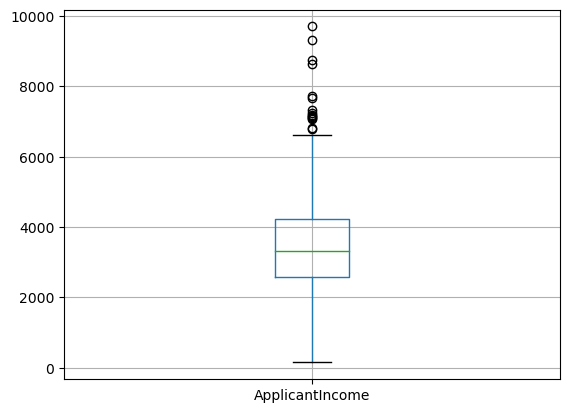

In [48]:
d.boxplot(column='ApplicantIncome')

<AxesSubplot:>

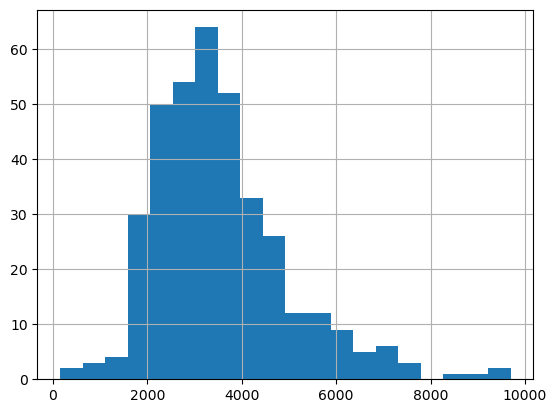

In [20]:
d['ApplicantIncome'].hist(bins=20)

<AxesSubplot:>

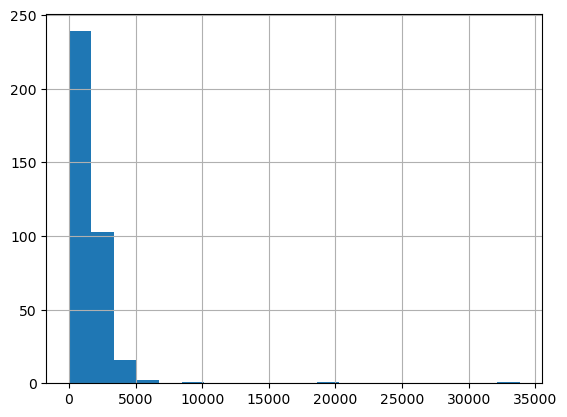

In [22]:
d['CoapplicantIncome'].hist(bins=20)

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

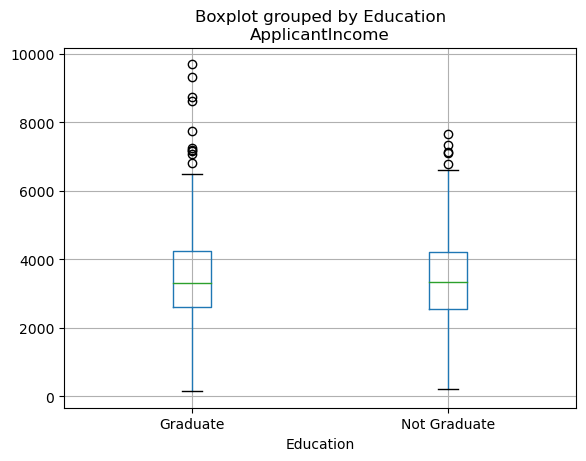

In [23]:
d.boxplot(column='ApplicantIncome',by='Education')

<AxesSubplot:>

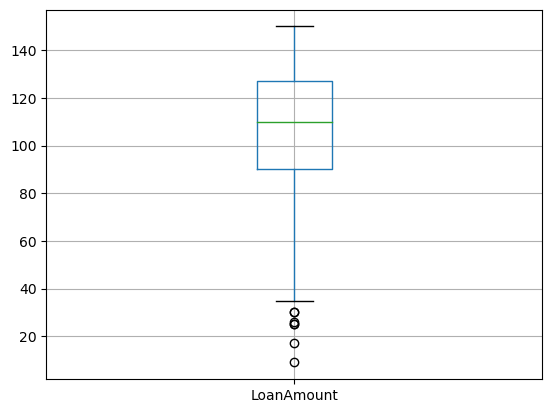

In [24]:
d.boxplot(column='LoanAmount')

<AxesSubplot:>

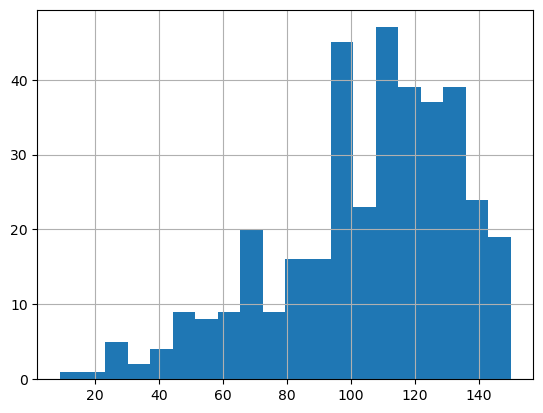

In [25]:
d['LoanAmount'].hist(bins=20)

<AxesSubplot:>

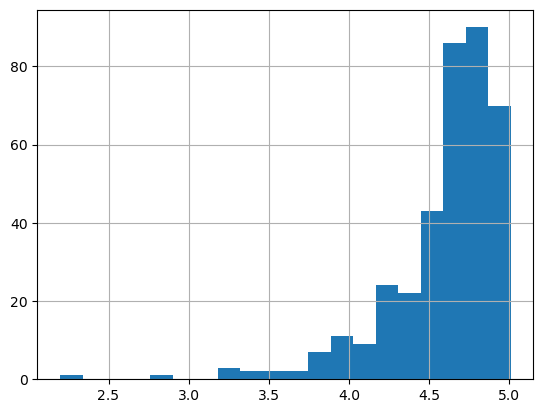

In [27]:
d['LoanAmount_log']=np.log(d['LoanAmount'])
d['LoanAmount_log'].hist(bins=20)

In [50]:
d.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             6
Self_Employed        21
ApplicantIncome      12
CoapplicantIncome    18
LoanAmount            8
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
LoanAmount-log        8
LoanAmount_log        8
dtype: int64

In [57]:
d['Gender'].fillna(d['Gender'].mode()[0],inplace=True)

In [58]:
d['Married'].fillna(d['Married'].mode()[0],inplace=True)

In [59]:
d['Dependents'].fillna(d['Dependents'].mode()[0],inplace=True)

In [60]:
d['Self_Employed'].fillna(d['Self_Employed'].mode()[0],inplace=True)

In [61]:
d.LoanAmount = d.LoanAmount.fillna(d.LoanAmount.mean())
d.LoanAmount_log = d.LoanAmount.fillna(d.LoanAmount_log.mean())

In [62]:
d['Loan_Amount_Term'].fillna(d['Loan_Amount_Term'].mode()[0],inplace=True)

In [63]:
d['Credit_History'].fillna(d['Credit_History'].mode()[0],inplace=True)

In [65]:
d['Education'].fillna(d['Education'].mode()[0],inplace=True)

In [70]:
d['ApplicantIncome'].fillna(d['ApplicantIncome'].mode()[0],inplace=True)

In [69]:
d['CoapplicantIncome'].fillna(d['CoapplicantIncome'].mode()[0],inplace=True)

In [72]:
d.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount-log       0
LoanAmount_log       0
dtype: int64

In [75]:
d['TotalIncome']=d['ApplicantIncome']+d['CoapplicantIncome']
d['TotalIncome_log']=np.log(d['TotalIncome'])

<AxesSubplot:>

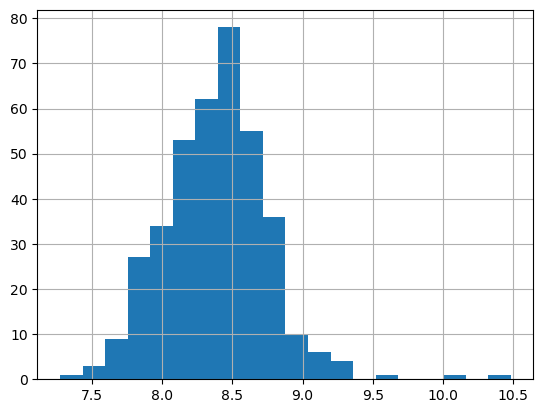

In [76]:
d['TotalIncome_log'].hist(bins=20)

In [77]:
d.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount-log,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,4.852030,128.0,6091.0,8.714568
1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,4.189655,66.0,3000.0,8.006368
2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,120.0,4941.0,8.505323
3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,4.948760,141.0,6000.0,8.699515
4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y,4.553877,95.0,3849.0,8.255569


In [83]:
X=d.iloc[:,np.r_[1:5,9:11,13:15]].values
Y=d.iloc[:,12].values

In [84]:
X

array([['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 128.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 66.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.787491742782046, 120.0],
       ...,
       ['Female', 'No', '0', ..., 1.0, 4.2626798770413155, 71.0],
       ['Male', 'Yes', '3+', ..., 1.0, 3.6888794541139363, 40.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 133.0]],
      dtype=object)

In [85]:
Y

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [89]:
print(X_train)

[['Male' 'Yes' '0' ... 1.0 4.653960350157523 105.0]
 ['Male' 'Yes' '3+' ... 1.0 4.727387818712341 113.0]
 ['Male' 'No' '0' ... 1.0 4.2626798770413155 71.0]
 ...
 ['Male' 'No' '0' ... 1.0 4.787491742782046 120.0]
 ['Female' 'No' '0' ... 0.0 4.7535901911063645 116.0]
 ['Male' 'Yes' '1' ... 1.0 4.74493212836325 115.0]]


In [92]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()

In [93]:
for i in range(0,5):
    X_train[:,i]=labelencoder_X.fit_transform(X_train[:,i])

In [94]:
X_train[:,7]=labelencoder_X.fit_transform(X_train[:,7])

In [95]:
X_train

array([[1, 1, 0, ..., 1.0, 4.653960350157523, 51],
       [1, 1, 3, ..., 1.0, 4.727387818712341, 59],
       [1, 0, 0, ..., 1.0, 4.2626798770413155, 25],
       ...,
       [1, 0, 0, ..., 1.0, 4.787491742782046, 65],
       [0, 0, 0, ..., 0.0, 4.7535901911063645, 62],
       [1, 1, 1, ..., 1.0, 4.74493212836325, 61]], dtype=object)

In [96]:
labelencoder_Y=LabelEncoder()
Y_train=labelencoder_Y.fit_transform(Y_train)

In [97]:
Y_train

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [98]:
for i in range(0,5):
    X_test[:,i]=labelencoder_X.fit_transform(X_test[:,i])

In [99]:
X_test[:,7]=labelencoder_X.fit_transform(X_test[:,7])

In [101]:
labelencoder_Y=LabelEncoder()
Y_test=labelencoder_Y.fit_transform(Y_test)

In [102]:
X_test

array([[0, 0, 1, 0, 5, 1.0, 4.718498871295094, 31],
       [1, 0, 2, 0, 5, 0.0, 4.382026634673881, 13],
       [1, 0, 0, 0, 5, 1.0, 4.543294782270004, 18],
       [1, 1, 2, 0, 5, 1.0, 4.890349128221754, 44],
       [0, 0, 0, 0, 5, 1.0, 3.828641396489095, 4],
       [0, 0, 0, 0, 5, 1.0, 3.784189633918261, 2],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 19],
       [1, 0, 0, 1, 1, 1.0, 3.2188758248682006, 1],
       [1, 1, 2, 0, 2, 1.0, 4.356708826689592, 12],
       [1, 1, 0, 0, 5, 1.0, 4.787491742782046, 38],
       [1, 0, 0, 0, 5, 1.0, 4.605170185988092, 23],
       [0, 1, 2, 1, 5, 1.0, 4.584967478670572, 21],
       [1, 1, 0, 0, 5, 1.0, 4.8283137373023015, 40],
       [1, 1, 0, 0, 5, 0.0, 4.0943445622221, 5],
       [1, 0, 3, 1, 5, 1.0, 4.997212273764115, 51],
       [1, 0, 0, 0, 5, 1.0, 4.912654885736052, 46],
       [1, 0, 0, 0, 5, 1.0, 4.941642422609304, 48],
       [0, 0, 1, 0, 5, 1.0, 4.499809670330265, 17],
       [1, 0, 0, 0, 6, 1.0, 4.727387818712341, 32],
       [1, 1, 0,

In [103]:
Y_test

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [105]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [107]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
DTClassifier.fit(X_train,Y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [109]:
Y_pred=DTClassifier.predict(X_test)
Y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1])

In [110]:
from sklearn import metrics
print('The accuracy of decision tree is: ',metrics.accuracy_score(Y_pred,Y_test))

The accuracy of decision tree is:  0.7012987012987013


In [112]:
from sklearn.naive_bayes import GaussianNB
NBClassifier=GaussianNB()
NBClassifier.fit(X_train,Y_train)

GaussianNB()

In [113]:
Y_pred=NBClassifier.predict(X_test)

In [114]:
Y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [116]:
print('The accuracy of Naive Bayes is: ',metrics.accuracy_score(Y_pred,Y_test))

The accuracy of Naive Bayes is:  0.8181818181818182


In [124]:
td=pd.read_csv("test.csv")

In [125]:
td.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y


In [126]:
td.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             6
Self_Employed        21
ApplicantIncome      12
CoapplicantIncome    18
LoanAmount            8
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [127]:
td = td.drop(['Unnamed: 0'], axis=1)

In [128]:
td.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y


In [134]:
td['Gender'].fillna(td['Gender'].mode()[0],inplace=True)
td['Married'].fillna(td['Married'].mode()[0],inplace=True)
td['Dependents'].fillna(td['Dependents'].mode()[0],inplace=True)
td['Self_Employed'].fillna(td['Self_Employed'].mode()[0],inplace=True)
td['LoanAmount'].fillna(td['LoanAmount'].mode()[0],inplace=True)
td['Loan_Amount_Term'].fillna(td['Loan_Amount_Term'].mode()[0],inplace=True)
td['Credit_History'].fillna(td['Credit_History'].mode()[0],inplace=True)
td['Education'].fillna(td['Education'].mode()[0],inplace=True)
td['ApplicantIncome'].fillna(td['ApplicantIncome'].mode()[0],inplace=True)
td['CoapplicantIncome'].fillna(td['CoapplicantIncome'].mode()[0],inplace=True)

In [135]:
td.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

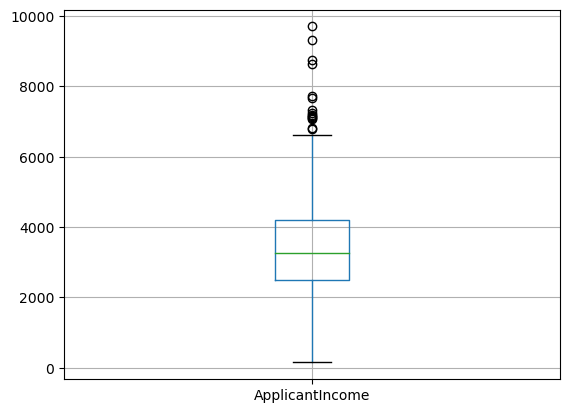

In [136]:
td.boxplot(column='ApplicantIncome')

In [137]:
td.LoanAmount=td.LoanAmount.fillna(testdata.LoanAmount.mean())

In [138]:
td['LoanAmount_log']=np.log(td['LoanAmount'])

In [140]:
td.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [141]:
td['TotalIncome']=td['ApplicantIncome']+td['CoapplicantIncome']
td['TotalIncome_log']=np.log(td['TotalIncome'])

In [142]:
td.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y,4.553877,3849.0,8.255569


In [143]:
test=td.iloc[:,np.r_[1:5,9:11,13:15]].values

In [144]:
for i in range(0,5):
    test[:,i]=labelencoder_X.fit_transform(test[:,i])

In [145]:
test[:,7]=labelencoder_X.fit_transform(test[:,7])

In [146]:
test

array([[1, 1, 1, ..., 1.0, 4.852030263919617, 281],
       [1, 1, 0, ..., 1.0, 4.189654742026425, 44],
       [1, 1, 0, ..., 1.0, 4.787491742782046, 217],
       ...,
       [0, 0, 0, ..., 1.0, 4.2626798770413155, 33],
       [1, 1, 3, ..., 1.0, 3.6888794541139363, 133],
       [0, 0, 0, ..., 0.0, 4.890349128221754, 176]], dtype=object)

In [149]:
test = ss.fit_transform(test)

In [150]:
pred=NBClassifier.predict(test)

In [151]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,